# Star Graph Problem

$$
H = \epsilon_0 S^z_0 + \sum_{i=1}^N\left[\epsilon_i S^z_i + J_i \vec{S}_0 \cdot \vec{S}_i\right]
$$

$$
\Delta \epsilon_N = \frac{1}{4}J_N^2 \frac{1}{\omega - \frac{1}{2}\epsilon_0 + \frac{1}{2}\epsilon_N + \frac{1}{4}J_N} = -\frac{1}{4}J_N^2 \frac{1}{\tilde\omega - \frac{1}{2}\epsilon_0}\\
\Delta \epsilon_0 = -\frac{1}{4}J_N^2 \frac{1}{\omega - \frac{1}{2}\epsilon_0 + \frac{1}{2}\epsilon_N + \frac{1}{4}J_N} = \frac{1}{4}J_N^2 \frac{1}{\tilde\omega - \frac{1}{2}\epsilon_0}
$$

In [8]:
from itertools import product
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

font = {'size'   : 30}
mpl.rc('font', **font)
mpl.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,nicefrac}')
plt.rcParams["figure.figsize"]= 10, 8
mpl.rcParams['lines.linewidth'] = 4

## Implementation of the RG equation

In [9]:
def rg_flow(N, w, e0, J):
    '''N is the total number of outer spins.
    w is omega_tilde, the rest are obvious.
    RG stops when either the denominator or E0 changes sign'''
    
    y = []    # stores the subsequently renormalised values of e0
    den = w - e0/2    # denominator that comes in the RG equation. Will be used to determine stopping condition
    for i in range(N,0,-1):    # decouple each outer spin one by one
        if e0 == 0 or den * (w - e0/2) <= 0:    # stop if e0 is zero or denominator changes sign
            
            # return the fixed point index i, fixed point value e0. 
            # The "true" tells that the RG was stopped before all spins could be decoupled  
            return i, y, True    
        y.append(e0)    # append renormalized e0 value
        den = w - e0/2    # denominator for sign change check
        deltae0 = (J**2/4)*1/(w - e0/2)    # renormalization from the actual RG equation 

        # apply the renormalization if e0 does not change sign. If e0 changes sign, stop it at 0 
        e0 = 0 if e0 * (e0 + deltae0) <= 0 else e0+deltae0    
        
    return i, y, False    # similar return, the "false" means all spins have been decoupled

## Visualization of RG flows for various values of $\epsilon_0$, $J$ and $\tilde\omega$

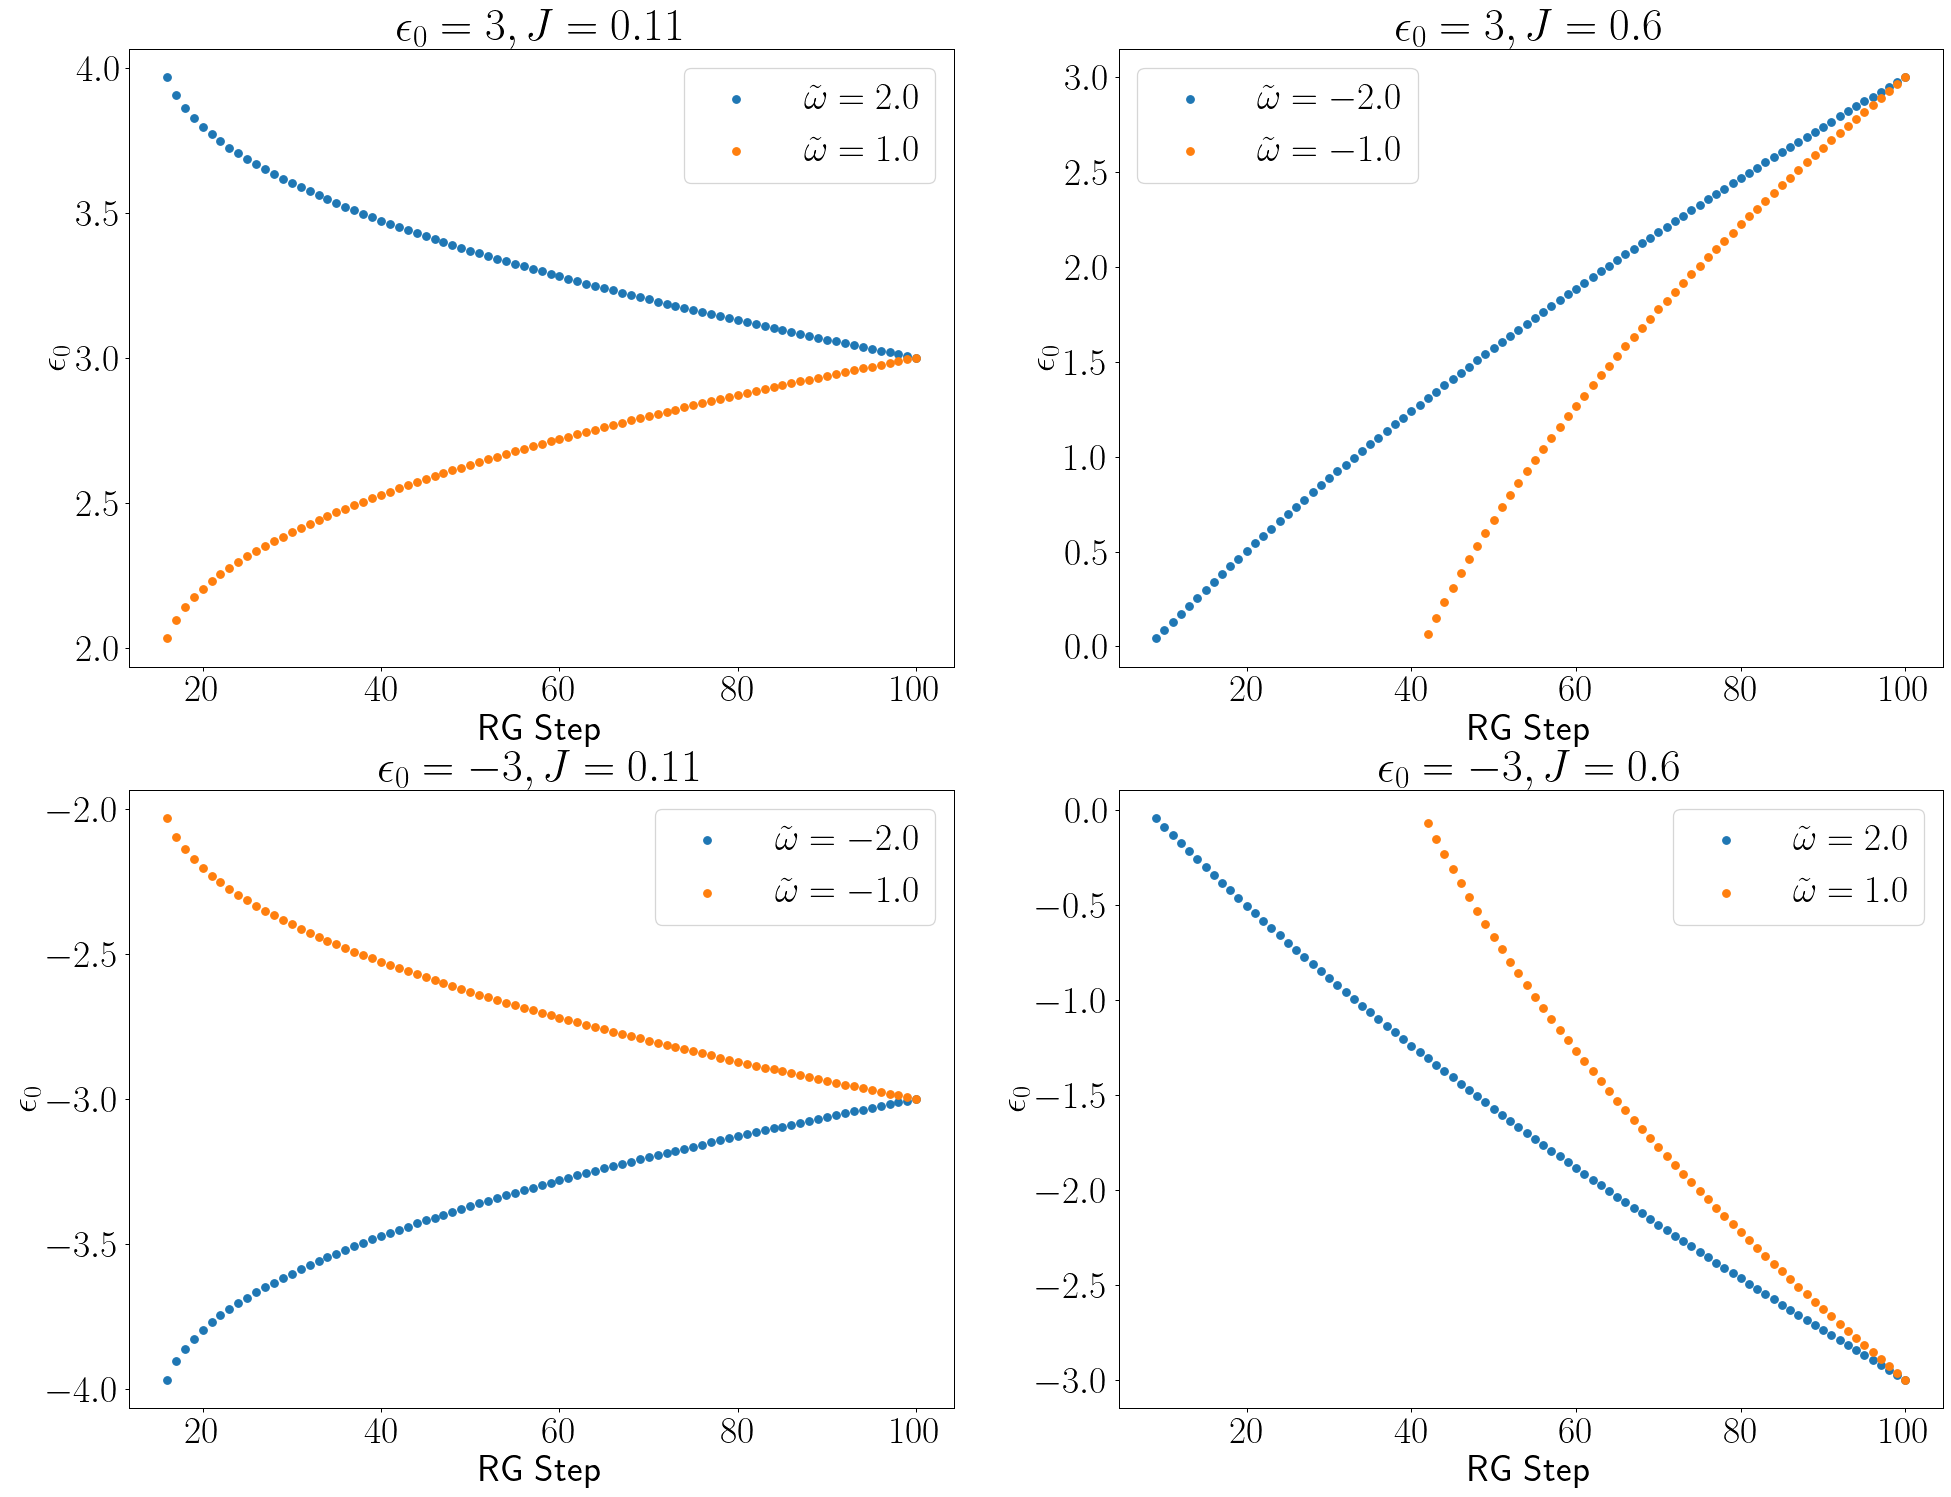

In [15]:
fig, ax = plt.subplots(2,2, figsize=(26, 20))
index = 0
N = 100
for e0 in [3, -3]:
    J = 0.11
    ax[index][0].set_title(r"$\epsilon_0={}, J = {}$".format(e0, J))
    for w in [e0*2/3, e0*1/3]:
        i, y, flag = rg_flow(N, w, e0, J)
        ax[index][0].scatter(range(N, i, -1), y, label=r"$\tilde\omega={}$".format(w))
    ax[index][0].set_xlabel(r"RG Step")
    ax[index][0].set_ylabel(r"$\epsilon_0$")
    ax[index][0].legend()
    
    J = 0.6
    ax[index][1].set_title(r"$\epsilon_0={}, J = {}$".format(e0, J))
    for w in [-e0*2/3, -e0*1/3]:
        i, y, flag = rg_flow(N, w, e0, J)
        ax[index][1].scatter(range(N, i, -1), y, label=r"$\tilde\omega={}$".format(w))
    ax[index][1].set_xlabel(r"RG Step")
    ax[index][1].set_ylabel(r"$\epsilon_0$")
    ax[index][1].legend()
    index += 1
    
plt.show()